In [1]:
import os
import sys
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu

In [2]:
def sort_items(a):
    path="./data/"
    return a[len(path)+1:len(a)-5]

In [3]:
path="./data/"
images = glob.glob(path+"/*3.jpeg")
images.sort(key=sort_items)
#a=sorted(images, key=sort_items)
print(len(images))

1


In [4]:
def thrsh1(img,t):
    inpt=img.copy()
    for i in range (len(inpt)):
        for j in range (len(inpt[i])):
            if inpt[i][j]>t:
                inpt[i][j]=t
    ret, thresh1 = cv2.threshold(inpt, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    cv2.imwrite("thresh1"+str(int(t))+".png",thresh1)
    plt.imshow(thresh1)
    return ret

def thrsh2(img,t):
    inpt=img.copy()
    for i in range(len(inpt)):
        for j in range (len(inpt[i])):
            if inpt[i][j]<t:
                inpt[i][j]=t
    ret, thresh1 = cv2.threshold(inpt, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    cv2.imwrite("thresh2"+str(int(t))+".png",thresh1)
    plt.imshow(thresh1)
    return ret,thresh1

def setpx(img,t1,t2,t3):
    inpt=img.copy()
    inpt1 = img.copy()
    inpt2 = img.copy()
    inpt3 = img.copy()
    for i in range(len(inpt)):
        for j in range (len(inpt[i])):
            if (inpt[i][j]<t1):
                inpt[i][j]=0
            elif(inpt[i][j]<t2):
                inpt[i][j]=t1
            elif (inpt[i][j]<t3):
                inpt[i][j]=t2
            else:
                inpt[i][j]=t3
    cv2.imwrite("Final.png",inpt)
    plt.imshow(inpt)
    return inpt

def writepx(img,t1,t2,t3):
    inpt=img.copy()
    inpt1 = img.copy()
    inpt2 = img.copy()
    inpt3 = img.copy()
    for i in range(len(inpt)):
        for j in range (len(inpt[i])):
            if (inpt1[i][j]==t1):
                inpt1[i][j]=t1
            else:
                inpt1[i][j]=0
            if(inpt2[i][j]==t2):
                inpt2[i][j]=t2
            else:
                inpt2[i][j]=0
            if (inpt3[i][j]==t3):
                inpt3[i][j]=t3
            else:
                inpt3[i][j]=0
                
    cv2.imwrite("inpt1.png",inpt1)
    cv2.imwrite("inpt2.png",inpt2)
    cv2.imwrite("inpt3.png",inpt3)

In [5]:
def im_show(img):
    cv2.imshow("image", img)
    cv2.waitKey(0) 
    cv2.destroyAllWindows() 

In [6]:
def crop(img, mask_pts):
    image = cv2.imread(img)
    #imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = np.zeros(image.shape[:2], dtype="uint8")
    pts = np.array(mask_pts)
    color = 255
    cv2.fillPoly(mask, [pts], color)
    masked = cv2.bitwise_and(image, image, mask=mask)
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = image[y:y+h, x:x+w].copy()
    print(croped.shape , image.shape)
    return croped, image

In [7]:
x,y = 1000,10
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
thickness = 2
color=(0,0,0)
count=0
out_path="./out/"
mask_pts = [[310,630], [1810,630], [1810,1280], [300,1280]]
image= None
i =0
for img in images:
    #path="./images5"
    i= i+1
    print(i)
    print(img[len(path):])
    croped, original = crop(img, mask_pts)
    x1=x+croped.shape[1]+200
    y1= y +20
    # red_box = cv2.rectangle(original, (x1, y1), (x1+300, y1+100), (255, 255, 255), -1)
    # original[y:y+croped.shape[0],x:x+croped.shape[1]] = croped
    # org=(x1+5,y1+60)
    image = croped
    im_show(croped)
    # count += int(input("enter count value"))
    # image = cv2.putText(original, str(count), org, font, fontScale, color, thickness, cv2.LINE_AA)
    # cv2.imwrite(out_path+img[len(path):],image)
    #im_show(original)

1
3.jpeg
(651, 1511, 3) (1512, 2016, 3)


In [8]:
# Applying multi-Otsu threshold for the default value, generating
# three classes.
image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresholds = threshold_multiotsu(image)

print(thresholds)

[134 174]


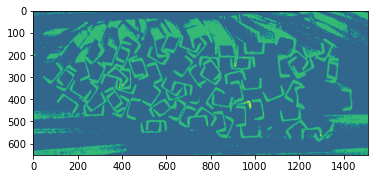

In [9]:
ret, thresh1 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
im_show(thresh1)
im_show(setpx(image, ret/2, ret, ret*(3/2)))

In [10]:
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print(len(contours))

1268


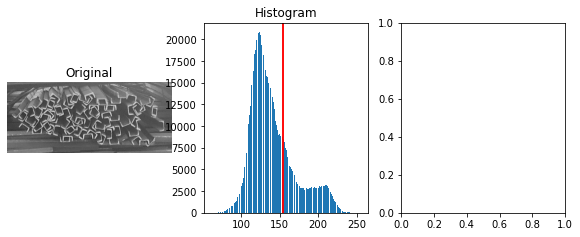

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(ret, color='r')
plt.subplots_adjust()

plt.show()